<a href="https://colab.research.google.com/github/Yasmine-ChemP/GMCtraining/blob/main/BostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#étape 1 : charger la base de données de boston
import tensorflow as tf
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
#Normalization
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [ ]:
#Building Model
from tensorflow.keras import models, layers
def build_model():
  model= tf.keras.Sequential()
  model.add(layers.Input(train_data.shape[1]))
  model.add(layers.Dense(32,activation='relu'))
  model.add(layers.Dense(32,activation='relu'))
  model.add(layers.Dense(1))

  model.compile(optimizer='rmsprop',loss='mse', metrics=['mae'])
  return model


In [ ]:
#Dataset too small , k-fold validation
import numpy as np
k=4
num_val_samples= len(train_data)//k
num_epochs=200
all_mae_history=[]

for i in range(k):
  print('processing fold #', i)
  #creating validation block /k samples
  val_data=train_data[i* num_val_samples:(i +1)*num_val_samples]
  val_targets=train_targets[i* num_val_samples:(i +1)*num_val_samples]

  #take rest of data
  partial_train_data= np.concatenate([train_data[i* num_val_samples:(i +1)*num_val_samples]],axis=0)
  partial_train_targets=np.concatenate([train_targets[i* num_val_samples: (i +1)*num_val_samples]],axis=0)
  model=build_model()

  #training
  history= model.fit(partial_train_data, partial_train_targets, validation_data=(val_data,val_targets),epochs=num_epochs, batch_size=1,verbose=0)

  #on realise une aggregation des données 
  #val_mse,val_mae=model.evaluate(val_data, val_targets, verbose=0)
  #all_score.append(val_mae)
  print(history.history.keys())
  mae_history=history.history["val_mae"]
  all_mae_history.append(mae_history)

processing fold # 0
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
processing fold # 1
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
processing fold # 2
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
processing fold # 3
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [ ]:
#On compile la moyenne de l'historique de chaque fold
average_mae_history = [np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)]

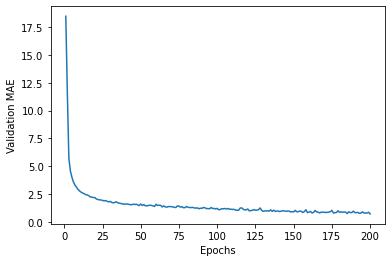

In [ ]:
#On finit par plotter la validation score.
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

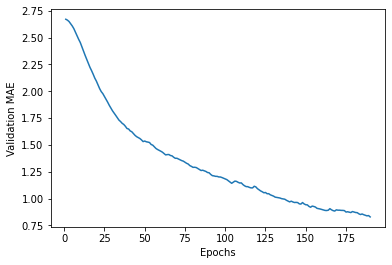

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
model= build_model()

model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score= model.evaluate(train_data, train_targets)



13/13 [==============================] - 0s 2ms/step - loss: 6.6106 - mae: 1.8186


In [ ]:
print(test_mae_score)

1.8185516595840454


In [ ]:
test_predict= model.predict(test_data)

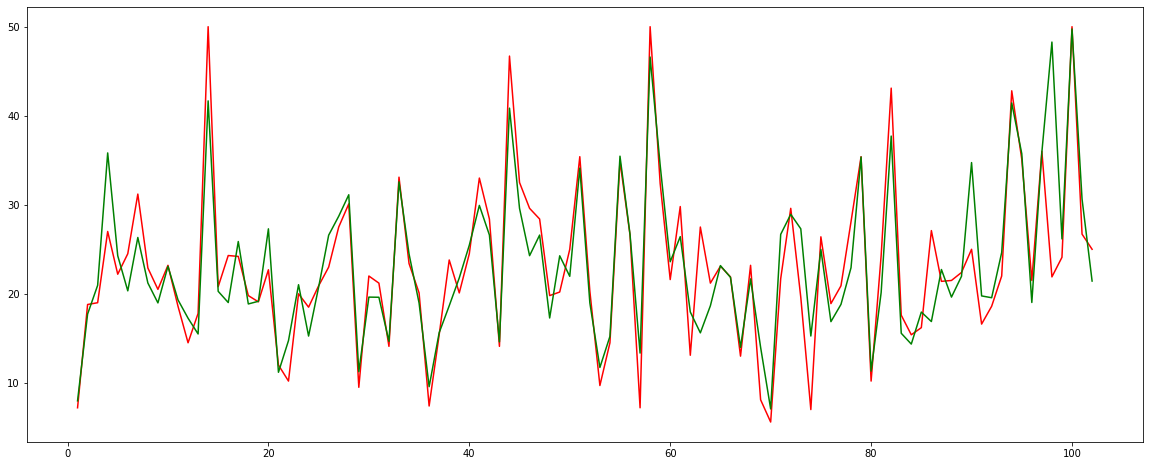

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(range(1,103), test_targets, color='r')
plt.plot(range(1,103), test_predict, color='g')
plt.show()
